In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

In [ ]:

colspecs1 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,41),(41,42),(42,43),(43,44),(56,62),(62,68),(68,71),(126,129),(129,139)]
dfHH1 = pd.read_fwf('TUS106_L01.txt', colspecs1)
columns1 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","InformantSI no","Response code", "Survey code","Casualty code","Date of Survey","Date of despatch", "Time to canvass","NSC", "Multiplier"]
dfHH1.columns =  columns1


colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
dfTUS2.columns =  columns2


colspecs3 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(39,42),(44,46),(46,56),(56,66),(66,76),(76,86),(86,96),(96,98),(98,99),(99,100),(100,101),(101,102),(102,103),(126,129),(129,139)]
dfHH3 = pd.read_fwf('TUS106_L03.txt', colspecs3)
columns3 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "HH Size", "Land Own", "Monthly HH expenses A", "Impute Home grown B", "Wages in Kind C", "HH durable spent D", "Overall monthly expenses", "Cooking energy", "lighting energy", "Washing clothes", "Sweeping floor", "Dwelling structure", "Care giver", "NSC", "Multiplier"]
dfHH3.columns =  columns3

colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
dfTUS4.columns =  columns4

colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
dfTUS5.columns =  columns5


In [ ]:
#State codes 
# Kashmir = 1
# HimachalPradesh = 2
# Punjab = 3
# Chandigar = 4
# Uttarakhand = 5
# Haryana = 6
# Delhi = 7
# Rajasthan = 8
# UttarPradesh = 9
# Bihar = 10
# Sikkim = 11
# ArunachalPradesh = 12
# Nagaland = 13
# Manipur = 14
# Mizoram = 15
# Tripura = 16
# Meghalaya = 17
# Assam = 18
# WestBengal = 19
# Jharkhand = 20
# Odisha = 21
# Chhatishgarh = 22
# MadhyaPradesh = 23
# Gujarat = 24
# DamanDiu = 25
# DNHaveli = 26
# Maharashtra = 27
# AndhraPradesh = 28
# Karnataka = 29
# Goa = 30
# Lakshadweep = 31
# Kerala = 32
# Tamilnadu = 33
# Puducherry = 34
# ANIslands = 35
# Telangana = 36

#All india data - rural sector only

df_INR_HH1 = dfHH1[(dfHH1.Sector == 2)]
df_INR_TUS2 = dfTUS2[(dfTUS2.Sector == 2)]
df_INR_HH3 = dfHH3[(dfHH3.Sector == 2)]
df_INR_TUS4 = dfTUS4[(dfTUS4.Sector == 2)]
df_INR_TUS5 = dfTUS5[(dfTUS5.Sector == 2)] 

#Maharshstra state rural households

df_MHR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 27)]
df_MHR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
df_MHR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 27)]
df_MHR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
df_MHR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

#UttarPradesh state rural households
## NOTE: Uttar Pradesh data has a mistake Urban is Sector 2 and Rural is sector 1 based on information given on Sampling TUS document

df_UPR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 9)]
df_UPR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 9)]
df_UPR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 9)]
df_UPR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 9)]
df_UPR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 9)]

#Nagaland State rural households
# Urban rural sector code swap

df_NGR_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 13)]
df_NGR_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 13)]
df_NGR_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 13)]
df_NGR_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 13)]
df_NGR_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 13)]

#Tamilnadu state rural households

df_TNR_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 33)]
df_TNR_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 33)]
df_TNR_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 33)]
df_TNR_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 33)]
df_TNR_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 33)]

df_INR_HH1.to_csv('INR_HH1.csv')
df_INR_TUS2.to_csv('INR_TUS2.csv')
df_INR_HH3.to_csv('INR_HH3.csv')
df_INR_TUS4.to_csv('INR_TUS4.csv')
df_INR_TUS5.to_csv('INR_TUS5.csv')

df_MHR_HH1.to_csv('MHR_HH1.csv')
df_MHR_TUS2.to_csv('MHR_TUS2.csv')
df_MHR_HH3.to_csv('MHR_HH3.csv')
df_MHR_TUS4.to_csv('MHR_TUS4.csv')
df_MHR_TUS5.to_csv('MHR_TUS5.csv')

df_UPR_HH1.to_csv('UPR_HH1.csv')
df_UPR_TUS2.to_csv('UPR_TUS2.csv')
df_UPR_HH3.to_csv('UPR_HH3.csv')
df_UPR_TUS4.to_csv('UPR_TUS4.csv')
df_UPR_TUS5.to_csv('UPR_TUS5.csv')

df_NGR_HH1.to_csv('NGR_HH1.csv')
df_NGR_TUS2.to_csv('NGR_TUS2.csv')
df_NGR_HH3.to_csv('NGR_HH3.csv')
df_NGR_TUS4.to_csv('NGR_TUS4.csv')
df_NGR_TUS5.to_csv('NGR_TUS5.csv')

df_TNR_HH1.to_csv('TNR_HH1.csv')
df_TNR_TUS2.to_csv('TNR_TUS2.csv')
df_TNR_HH3.to_csv('TNR_HH3.csv')
df_TNR_TUS4.to_csv('TNR_TUS4.csv')
df_TNR_TUS5.to_csv('TNR_TUS5.csv')

In [2]:
df_INR_HH1 = pd.read_csv('INR_HH1.csv')
df_INR_TUS2 = pd.read_csv('INR_TUS2.csv')
df_INR_HH3 = pd.read_csv('INR_HH3.csv')
df_INR_TUS4 = pd.read_csv('INR_TUS4.csv')
df_INR_TUS5 = pd.read_csv('INR_TUS5.csv')


df_MHR_HH1 = pd.read_csv('MHR_HH1.csv')
df_MHR_TUS2 = pd.read_csv('MHR_TUS2.csv')
df_MHR_HH3 = pd.read_csv('MHR_HH3.csv')
df_MHR_TUS4 = pd.read_csv('MHR_TUS4.csv')
df_MHR_TUS5 = pd.read_csv('MHR_TUS5.csv')

df_UPR_HH1 = pd.read_csv('UPR_HH1.csv')
df_UPR_TUS2 = pd.read_csv('UPR_TUS2.csv')
df_UPR_HH3 = pd.read_csv('UPR_HH3.csv')
df_UPR_TUS4 = pd.read_csv('UPR_TUS4.csv')
df_UPR_TUS5 = pd.read_csv('UPR_TUS5.csv')

df_NGR_HH1 = pd.read_csv('NGR_HH1.csv')
df_NGR_TUS2 = pd.read_csv('NGR_TUS2.csv')
df_NGR_HH3 = pd.read_csv('NGR_HH3.csv')
df_NGR_TUS4 = pd.read_csv('NGR_TUS4.csv')
df_NGR_TUS5 = pd.read_csv('NGR_TUS5.csv')

df_TNR_HH1 = pd.read_csv('TNR_HH1.csv')
df_TNR_TUS2 = pd.read_csv('TNR_TUS2.csv')
df_TNR_HH3 = pd.read_csv('TNR_HH3.csv')
df_TNR_TUS4 = pd.read_csv('TNR_TUS4.csv')
df_TNR_TUS5 = pd.read_csv('TNR_TUS5.csv')

In [ ]:
#All india data - urban sector only

df_INU_HH1 = dfHH1[(dfHH1.Sector == 1)]
df_INU_TUS2 = dfTUS2[(dfTUS2.Sector == 1)]
df_INU_HH3 = dfHH3[(dfHH3.Sector == 1)]
df_INU_TUS4 = dfTUS4[(dfTUS4.Sector == 1)]
df_INU_TUS5 = dfTUS5[(dfTUS5.Sector == 1)] 

#Maharshstra state urban households

df_MHU_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 27)]
df_MHU_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 27)]
df_MHU_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 27)]
df_MHU_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 27)]
df_MHU_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 27)]

#UttarPradesh state urban households
## NOTE: Uttar Pradesh data has a mistake Urban is Sector 2 and Rural is sector 1 based on information given on Sampling TUS document

df_UPU_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 9)]
df_UPU_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 9)]
df_UPU_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 9)]
df_UPU_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 9)]
df_UPU_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 9)]

#Nagaland State urban households

df_NGU_HH1 = dfHH1[(dfHH1.Sector == 2) & (dfHH1.State == 13)]
df_NGU_TUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 13)]
df_NGU_HH3 = dfHH3[(dfHH3.Sector == 2) & (dfHH3.State == 13)]
df_NGU_TUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 13)]
df_NGU_TUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 13)]

#Tamilnadu state urban households

df_TNU_HH1 = dfHH1[(dfHH1.Sector == 1) & (dfHH1.State == 33)]
df_TNU_TUS2 = dfTUS2[(dfTUS2.Sector == 1) & (dfTUS2.State == 33)]
df_TNU_HH3 = dfHH3[(dfHH3.Sector == 1) & (dfHH3.State == 33)]
df_TNU_TUS4 = dfTUS4[(dfTUS4.Sector == 1) & (dfTUS4.State == 33)]
df_TNU_TUS5 = dfTUS5[(dfTUS5.Sector == 1) & (dfTUS5.State == 33)]

df_INU_HH1.to_csv('INU_HH1.csv')
df_INU_TUS2.to_csv('INU_TUS2.csv')
df_INU_HH3.to_csv('INU_HH3.csv')
df_INU_TUS4.to_csv('INU_TUS4.csv')
df_INU_TUS5.to_csv('INU_TUS5.csv')

df_MHU_HH1.to_csv('MHU_HH1.csv')
df_MHU_TUS2.to_csv('MHU_TUS2.csv')
df_MHU_HH3.to_csv('MHU_HH3.csv')
df_MHU_TUS4.to_csv('MHU_TUS4.csv')
df_MHU_TUS5.to_csv('MHU_TUS5.csv')

df_UPU_HH1.to_csv('UPU_HH1.csv')
df_UPU_TUS2.to_csv('UPU_TUS2.csv')
df_UPU_HH3.to_csv('UPU_HH3.csv')
df_UPU_TUS4.to_csv('UPU_TUS4.csv')
df_UPU_TUS5.to_csv('UPU_TUS5.csv')

df_NGU_HH1.to_csv('NGU_HH1.csv')
df_NGU_TUS2.to_csv('NGU_TUS2.csv')
df_NGU_HH3.to_csv('NGU_HH3.csv')
df_NGU_TUS4.to_csv('NGU_TUS4.csv')
df_NGU_TUS5.to_csv('NGU_TUS5.csv')

df_TNU_HH1.to_csv('TNU_HH1.csv')
df_TNU_TUS2.to_csv('TNU_TUS2.csv')
df_TNU_HH3.to_csv('TNU_HH3.csv')
df_TNU_TUS4.to_csv('TNU_TUS4.csv')
df_TNU_TUS5.to_csv('TNU_TUS5.csv')

In [ ]:
# confirming total number of FSUs sampled are from rural sector in each state - verify with Sampling TUS document

print(df_MHR_HH1['FSU'].nunique()) # Should be around 448
print(df_UPR_HH1['FSU'].nunique()) # Should be around 800
print(df_NGR_HH1['FSU'].nunique()) # Should be around 48
print(df_TNR_HH1['FSU'].nunique()) # Should be around 300

print(df_MHU_HH1['FSU'].nunique()) # Should be around 448
print(df_UPU_HH1['FSU'].nunique()) # Should be around 396
print(df_NGU_HH1['FSU'].nunique()) # Should be around 32 
print(df_TNU_HH1['FSU'].nunique()) # Should be around 300

In [ ]:
# Number of households surveyed in each state rural sector

print(df_MHR_HH1.shape[0])
print(df_UPR_HH1.shape[0])
print(df_NGR_HH1.shape[0])
print(df_TNR_HH1.shape[0])

print(df_MHR_HH3.shape[0])
print(df_UPR_HH3.shape[0])
print(df_NGR_HH3.shape[0])
print(df_TNR_HH3.shape[0])

# print(df_MHU_HH1.shape[0])
# print(df_UPU_HH1.shape[0])
# print(df_NGU_HH1.shape[0])
# print(df_TNU_HH1.shape[0])

# print(df_MHU_HH3.shape[0])
# print(df_UPU_HH3.shape[0])
# print(df_NGU_HH3.shape[0])
# print(df_TNU_HH3.shape[0])

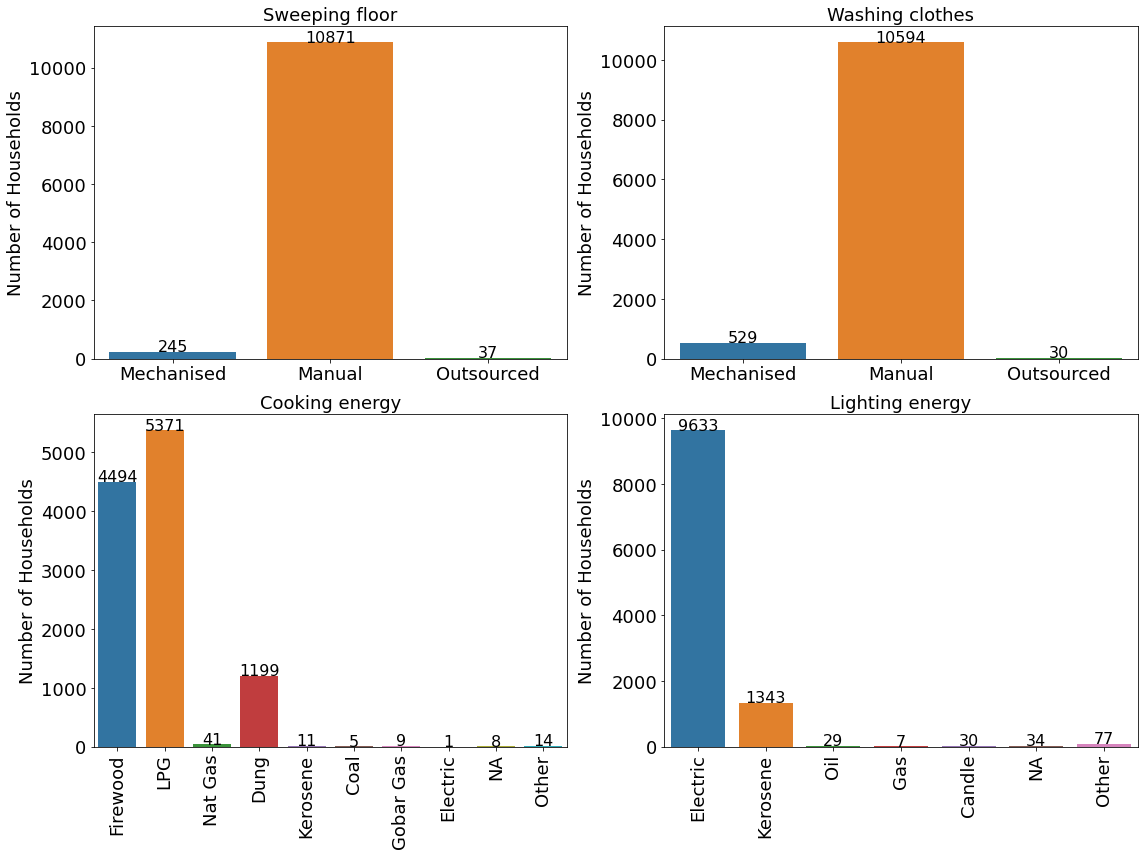

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.font_manager import FontProperties

# create four subplots with four different data frames
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Define Times New Roman font
#font = FontProperties()
#ont.set_family('serif')
#font.set_name('Times New Roman')

# first subplot
ax1 = axs[0, 0]
sns.countplot(x=df_UPR_HH3['Sweeping floor'], ax=ax1)
ax1.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_title('Sweeping floor', fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Households', fontsize=18)

               
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')   

# second subplot
ax2 = axs[0,1]
sns.countplot(x=df_UPR_HH3['Washing clothes'], ax=ax2)
ax2.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title('Washing clothes', fontsize=18)
ax2.set_xlabel('')
ax2.set_ylabel('Number of Households', fontsize=18)

# Add data display to second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# third subplot
ax3 = axs[1, 0]
sns.countplot(x=df_UPR_HH3['Cooking energy'], ax=ax3)
ax3.set_xticklabels(['Firewood','LPG','Nat Gas','Dung','Kerosene','Coal','Gobar Gas','Electric','NA','Other'], 
                     rotation=90, fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_title('Cooking energy', fontsize=18)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Households', fontsize=18)

# Add data display to third subplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# fourth subplot
ax4 = axs[1, 1]
sns.countplot(x=df_UPR_HH3['lighting energy'], ax=ax4)
ax4.set_xticklabels(['Electric','Kerosene','Oil','Gas','Candle','NA','Other'], rotation=90, fontsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_title('Lighting energy', fontsize=18)
ax4.set_xlabel('')
ax4.set_ylabel('Number of Households', fontsize=18)

# Add data display to first subplot
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

           
               


# for ax in axs.flat:
#     ax.tick_params(axis='both', which='major', labelsize=18)
#     ax.grid(False)

    
# save and show the plot
plt.tight_layout()
plt.savefig('Uttar_pradesh_energy.png', dpi=300)
plt.show()

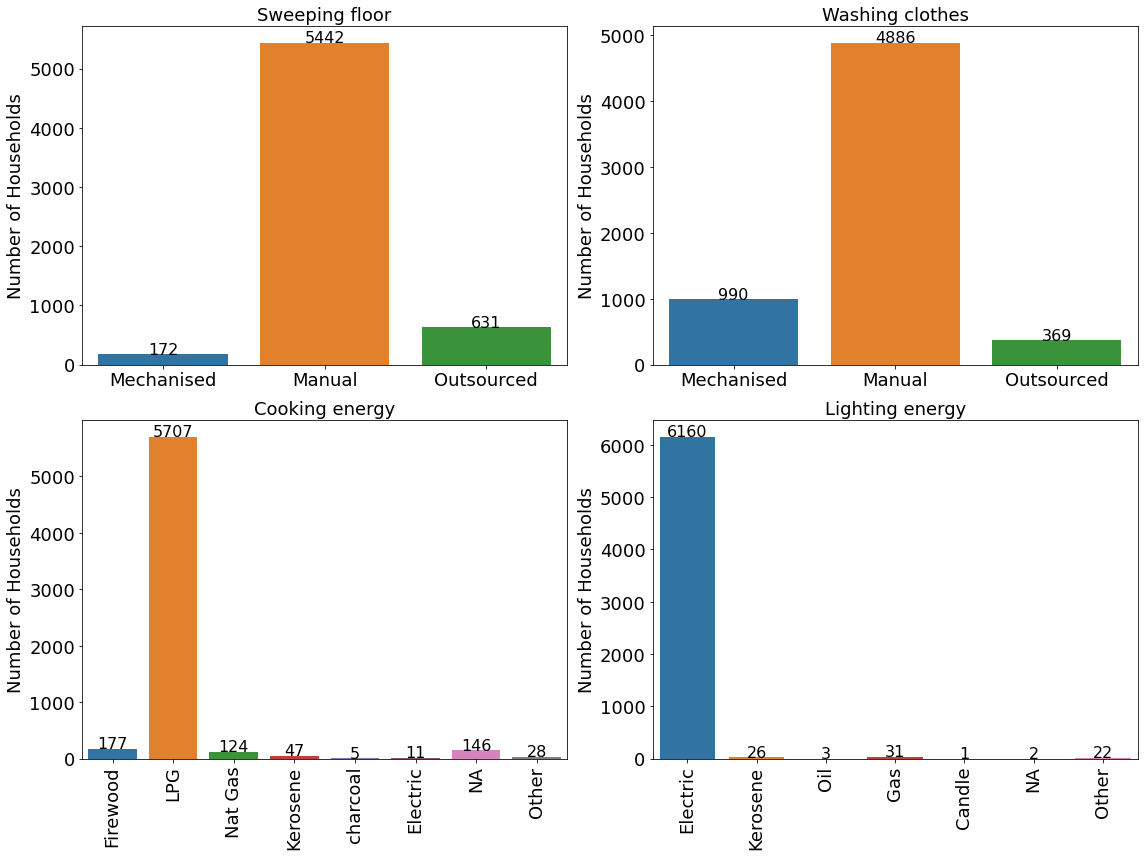

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Define Times New Roman font
#font = FontProperties()
#ont.set_family('serif')
#font.set_name('Times New Roman')

# first subplot
ax1 = axs[0, 0]
sns.countplot(x=df_MHR_HH3['Sweeping floor'], ax=ax1)
ax1.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_title('Sweeping floor', fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Households', fontsize=18)

               
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')   

# second subplot
ax2 = axs[0,1]
sns.countplot(x=df_MHR_HH3['Washing clothes'], ax=ax2)
ax2.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title('Washing clothes', fontsize=18)
ax2.set_xlabel('')
ax2.set_ylabel('Number of Households', fontsize=18)

# Add data display to second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# third subplot
ax3 = axs[1, 0]
sns.countplot(x=df_MHR_HH3['Cooking energy'], ax=ax3)
ax3.set_xticklabels(['Firewood','LPG','Nat Gas','Kerosene','charcoal','Electric','NA','Other'], 
                     rotation=90, fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_title('Cooking energy', fontsize=18)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Households', fontsize=18)

# Add data display to third subplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# fourth subplot
ax4 = axs[1, 1]
sns.countplot(x=df_MHR_HH3['lighting energy'], ax=ax4)
ax4.set_xticklabels(['Electric','Kerosene','Oil','Gas','Candle','NA','Other'], rotation=90, fontsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_title('Lighting energy', fontsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_xlabel('')
ax4.set_ylabel('Number of Households', fontsize=18)

# Add data display to first subplot
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

           
               


# for ax in axs.flat:
#     ax.tick_params(axis='both', which='major', labelsize=18)
#     ax.grid(False)

    
# save and show the plot
plt.tight_layout()
plt.savefig('Maharshtra_energy.png', dpi=300)
plt.show()

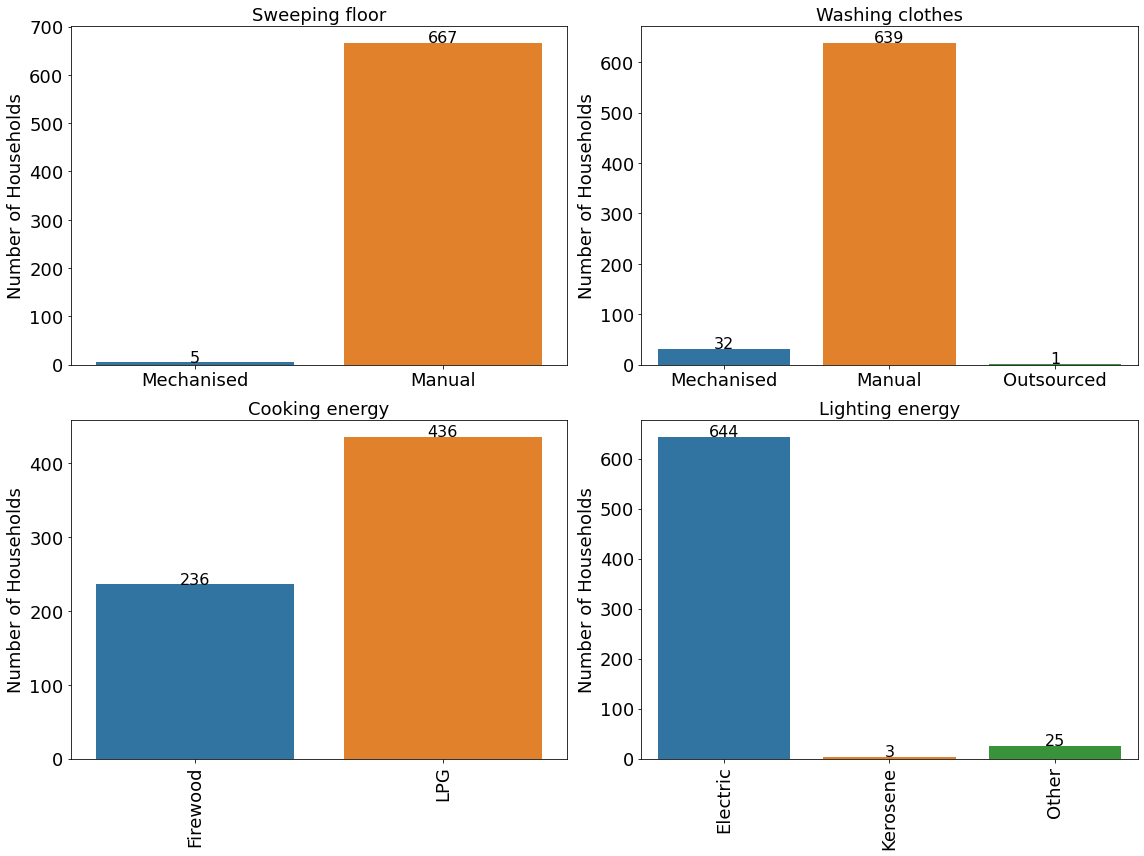

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Define Times New Roman font
#font = FontProperties()
#ont.set_family('serif')
#font.set_name('Times New Roman')

# first subplot
ax1 = axs[0, 0]
sns.countplot(x=df_NGR_HH3['Sweeping floor'], ax=ax1)
ax1.set_xticklabels(['Mechanised','Manual'], fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_title('Sweeping floor', fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Households', fontsize=18)

               
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')   

# second subplot
ax2 = axs[0,1]
sns.countplot(x=df_NGR_HH3['Washing clothes'], ax=ax2)
ax2.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title('Washing clothes', fontsize=18)
ax2.set_xlabel('')
ax2.set_ylabel('Number of Households', fontsize=18)

# Add data display to second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# third subplot
ax3 = axs[1, 0]
sns.countplot(x=df_NGR_HH3['Cooking energy'], ax=ax3)
ax3.set_xticklabels(['Firewood','LPG'], rotation=90,fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_title('Cooking energy', fontsize=18)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Households', fontsize=18)

# Add data display to third subplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# fourth subplot
ax4 = axs[1, 1]
sns.countplot(x=df_NGR_HH3['lighting energy'], ax=ax4)
ax4.set_xticklabels(['Electric','Kerosene','Other'], rotation=90, fontsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_title('Lighting energy', fontsize=18)
ax4.set_xlabel('')
ax4.set_ylabel('Number of Households', fontsize=18)

# Add data display to first subplot
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

           
               


# for ax in axs.flat:
#     ax.tick_params(axis='both', which='major', labelsize=18)
#     ax.grid(False)

    
# save and show the plot
plt.tight_layout()
plt.savefig('Nagaland_energy.png', dpi=300)
plt.show()

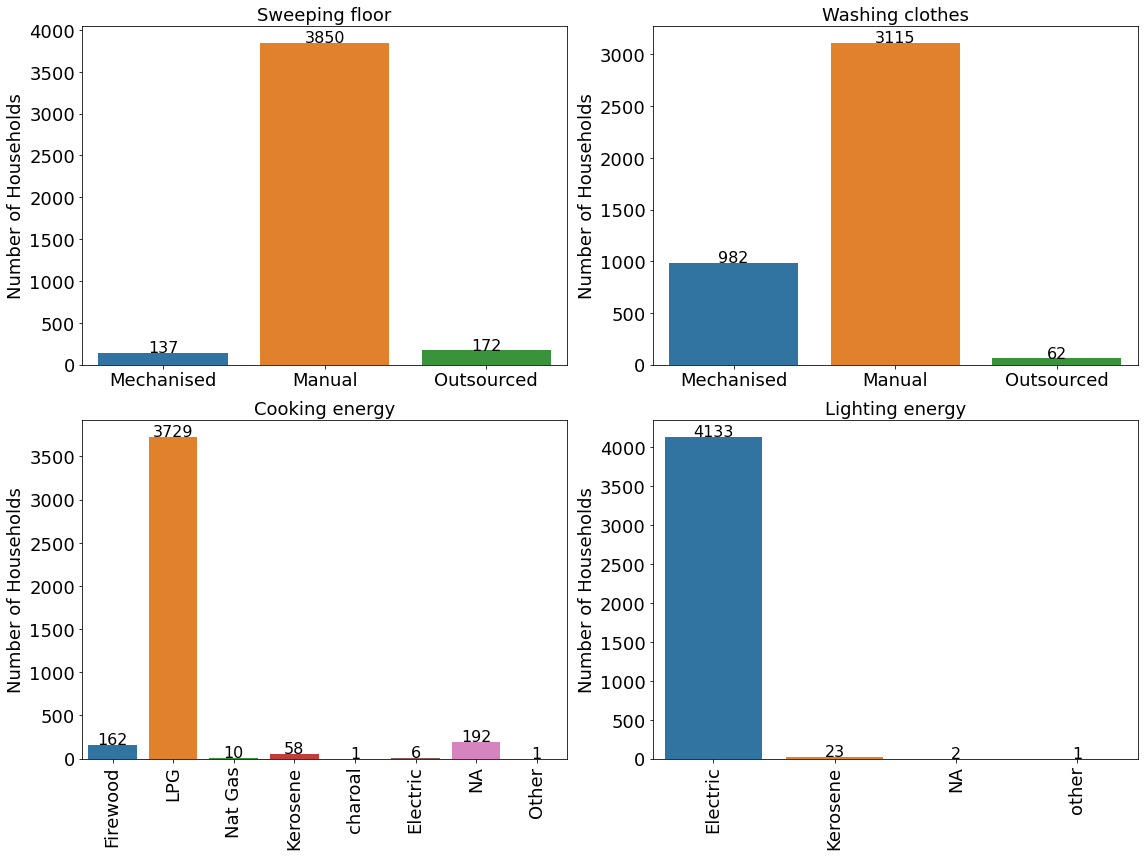

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Define Times New Roman font
#font = FontProperties()
#ont.set_family('serif')
#font.set_name('Times New Roman')

# first subplot
ax1 = axs[0, 0]
sns.countplot(x=df_TNR_HH3['Sweeping floor'], ax=ax1)
ax1.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_title('Sweeping floor', fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Households', fontsize=18)

               
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')   

# second subplot
ax2 = axs[0,1]
sns.countplot(x=df_TNR_HH3['Washing clothes'], ax=ax2)
ax2.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title('Washing clothes', fontsize=18)
ax2.set_xlabel('')
ax2.set_ylabel('Number of Households', fontsize=18)

# Add data display to second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# third subplot
ax3 = axs[1, 0]
sns.countplot(x=df_TNR_HH3['Cooking energy'], ax=ax3)
ax3.set_xticklabels(['Firewood','LPG','Nat Gas','Kerosene','charoal','Electric','NA','Other'], rotation=90,fontsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_title('Cooking energy', fontsize=18)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Households', fontsize=18)

# Add data display to third subplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# fourth subplot
ax4 = axs[1, 1]
sns.countplot(x=df_TNR_HH3['lighting energy'], ax=ax4)
ax4.set_xticklabels(['Electric','Kerosene','NA','other'], rotation=90, fontsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_title('Lighting energy', fontsize=18)
ax4.set_xlabel('')
ax4.set_ylabel('Number of Households', fontsize=18)

# Add data display to first subplot
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

           
               


# for ax in axs.flat:
#     ax.tick_params(axis='both', which='major', labelsize=18)
#     ax.grid(False)

    
# save and show the plot
plt.tight_layout()
plt.savefig('Tamilnadu_energy.png', dpi=300)
plt.show()

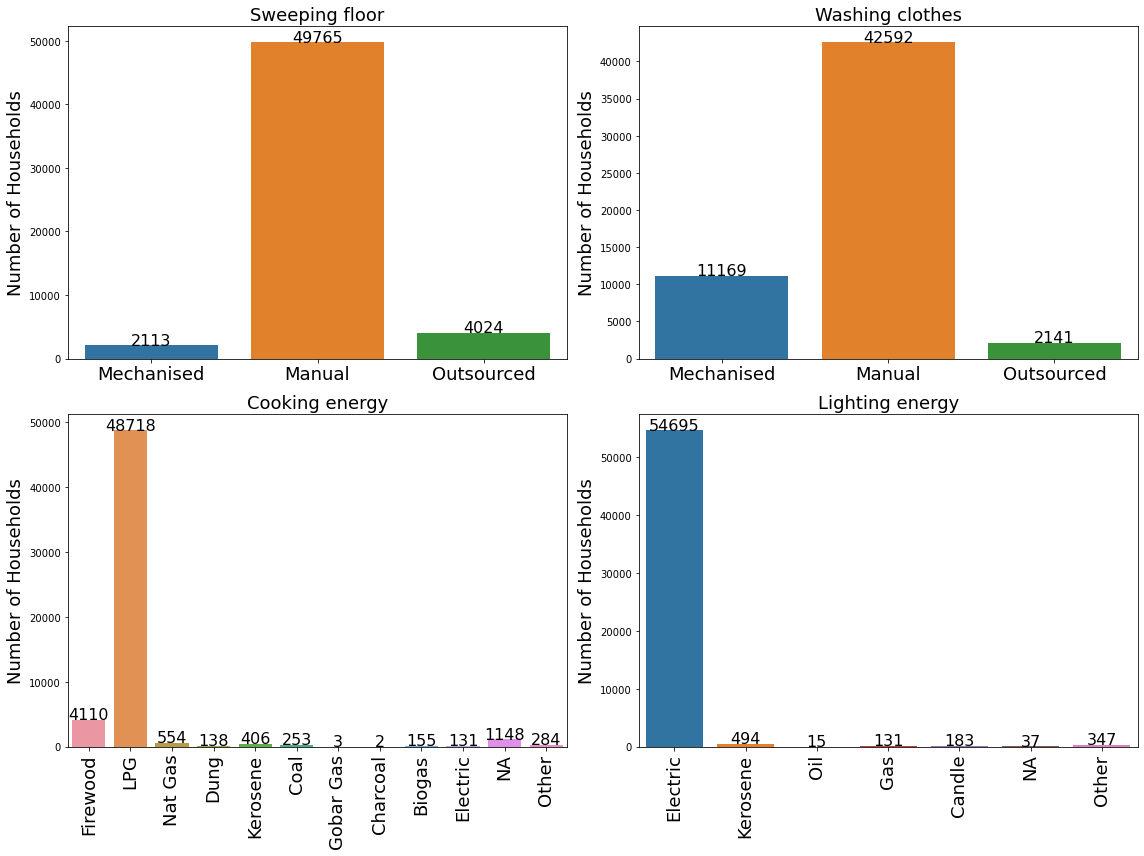

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Define Times New Roman font
#font = FontProperties()
#ont.set_family('serif')
#font.set_name('Times New Roman')

# first subplot
ax1 = axs[0, 0]
sns.countplot(x=df_INR_HH3['Sweeping floor'], ax=ax1)
ax1.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax1.set_title('Sweeping floor', fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Households', fontsize=18)

               
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')   

# second subplot
ax2 = axs[0,1]
sns.countplot(x=df_INR_HH3['Washing clothes'], ax=ax2)
ax2.set_xticklabels(['Mechanised','Manual','Outsourced'], fontsize=18)
ax2.set_title('Washing clothes', fontsize=18)
ax2.set_xlabel('')
ax2.set_ylabel('Number of Households', fontsize=18)

# Add data display to second subplot
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# third subplot
ax3 = axs[1, 0]
sns.countplot(x=df_INR_HH3['Cooking energy'], ax=ax3)
ax3.set_xticklabels(['Firewood','LPG','Nat Gas','Dung','Kerosene','Coal','Gobar Gas','Charcoal','Biogas','Electric','NA','Other'], 
                     rotation=90, fontsize=18)
ax3.set_title('Cooking energy', fontsize=18)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Households', fontsize=18)

# Add data display to third subplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

# fourth subplot
ax4 = axs[1, 1]
sns.countplot(x=df_INR_HH3['lighting energy'], ax=ax4)
ax4.set_xticklabels(['Electric','Kerosene','Oil','Gas','Candle','NA','Other'], rotation=90, fontsize=18)
ax4.set_title('Lighting energy', fontsize=18)
ax4.set_xlabel('')
ax4.set_ylabel('Number of Households', fontsize=18)

# Add data display to first subplot
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                  textcoords='offset points')

           
               


# for ax in axs.flat:
#     ax.tick_params(axis='both', which='major', labelsize=18)
#     ax.grid(False)

    
# save and show the plot
plt.tight_layout()
plt.savefig('AllIndia_energy.png', dpi=300)
plt.show()